In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

journal_entries = pd.read_excel("Vinatics 2019 Journal Entries.xlsx")
journal_entries.head()

,JE Number,GL Code,Period,Effective Date,Entry Date,Source,Source Group,Functional Amount,Preparer
0,210000003,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-302887.20000,Merrie Beaver
1,210000003,60000113,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,250320.00000,Merrie Beaver
2,210000003,20001102,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,52567.20000,Merrie Beaver
3,210000006,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-11708.75376,Merrie Beaver
4,210000006,60000112,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,9676.65600,Merrie Beaver


In [2]:
#Identities of person making journal entries and Segregation of duties
segregation_of_duties = journal_entries.copy()

segregation_of_duties = segregation_of_duties[['GL Code','Source Group','Entry Date','Functional Amount','Preparer']]
segregation_of_duties = segregation_of_duties.groupby(['Preparer','Source Group'])['Functional Amount'].count().to_frame(name='Journal Entry Count').reset_index()
segregation_of_duties

,Preparer,Source Group,Journal Entry Count
0,Akiko Mattox,Cash inflow,10042
1,Akiko Mattox,Cash outflow,14646
2,Akiko Mattox,GL document,1090
3,Akiko Mattox,Purchases,1624
4,Akiko Mattox,Receivables,1060
...,...,...,...
87,Treva Vanburen,Cash outflow,91
88,Treva Vanburen,Receivables,36
89,Treva Vanburen,Sales,8
90,Yoko Coon,Goods receipts,1016


<ipython-input-3-178ffa2e2fb1>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  sgs.set_xticklabels(segregation_of_duties['Preparer'].unique().tolist(), rotation=90)


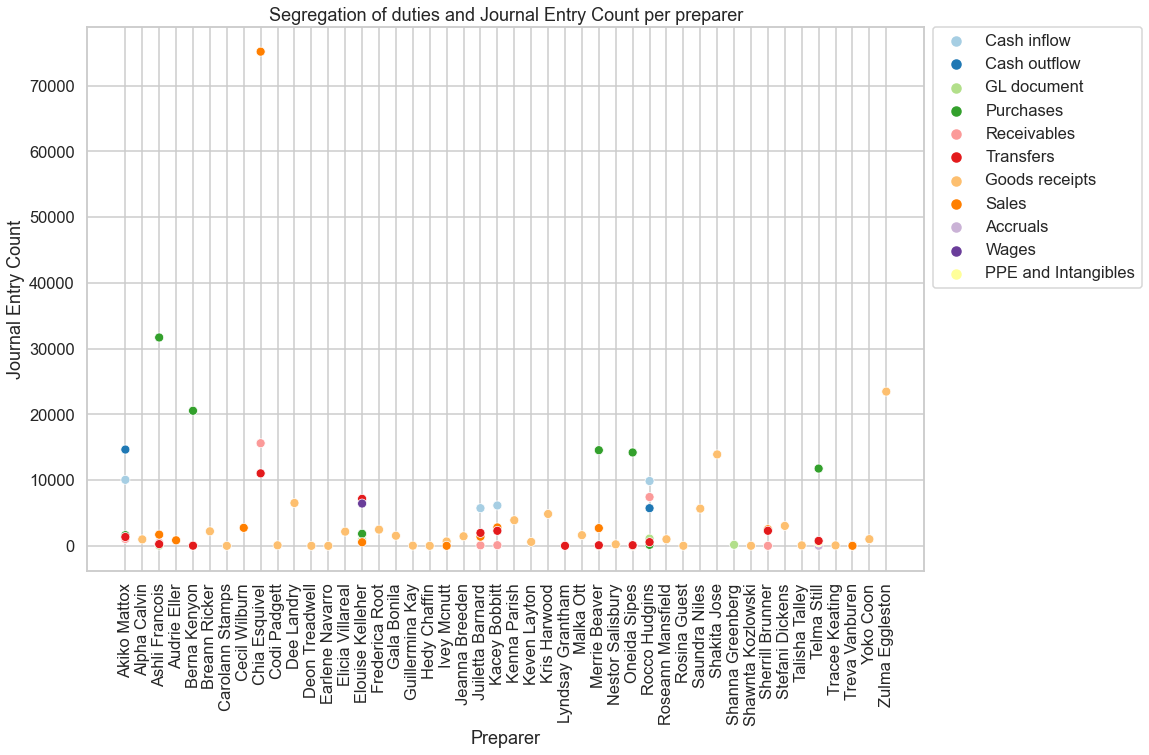

In [3]:
sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,10))

sgs = sns.scatterplot(x='Preparer', y='Journal Entry Count', data=segregation_of_duties, palette='Paired', hue='Source Group', hue_order=segregation_of_duties['Source Group'].unique(), ax=ax)

sgs.set_xticklabels(segregation_of_duties['Preparer'].unique().tolist(), rotation=90)
plt.title('Segregation of duties and Journal Entry Count per preparer')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, loc='upper left')
plt.show()

In [4]:
#Identities of person making journal entries and Segregation of duties
segregation_of_duties_source = journal_entries.copy()
segregation_of_duties_source = segregation_of_duties_source[['GL Code','Source','Entry Date','Functional Amount','Preparer']]
segregation_of_duties_source = segregation_of_duties_source.groupby(['Preparer','Source'])['Functional Amount'].count().to_frame(name='Journal Entry Count').reset_index()
segregation_of_duties_source

,Preparer,Source,Journal Entry Count
0,Akiko Mattox,Balance set-off,978
1,Akiko Mattox,Cash movement,8
2,Akiko Mattox,Collections,1009
3,Akiko Mattox,Credit note,61
4,Akiko Mattox,Customers payment,94
...,...,...,...
135,Treva Vanburen,Debit note,4
136,Treva Vanburen,Unpaid,36
137,Treva Vanburen,Vendor payments,91
138,Yoko Coon,Goods receipt,1016


<ipython-input-6-a9c396fdafc7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  sgs.set_xticklabels(segregation_of_duties_source['Preparer'].unique().tolist(), rotation=90)


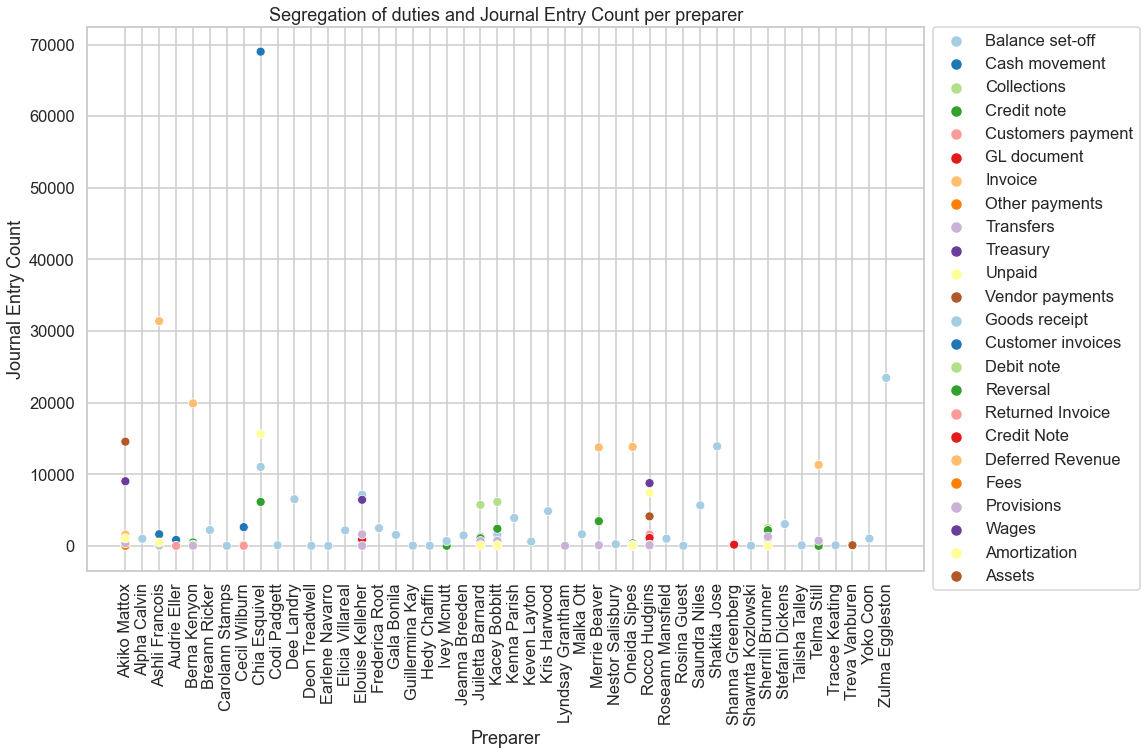

In [6]:
sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,10))

sgs = sns.scatterplot(x='Preparer', y='Journal Entry Count', data=segregation_of_duties_source, palette='Paired', hue='Source', hue_order=segregation_of_duties_source['Source'].unique(), ax=ax)

sgs.set_xticklabels(segregation_of_duties_source['Preparer'].unique().tolist(), rotation=90)
plt.title('Segregation of duties and Journal Entry Count per preparer')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, loc='upper left')
plt.show()

In [7]:
journal_entries.pivot_table(index='Preparer', columns='Source Group', values='Functional Amount', aggfunc='count')
# .fillna(0)

Source Group,Accruals,Cash inflow,Cash outflow,GL document,Goods receipts,PPE and Intangibles,Purchases,Receivables,Sales,Transfers,Wages
Preparer,,,,,,,,,,,
Akiko Mattox,NaN,10042.0,14646.0,1090.0,NaN,NaN,1624.0,1060.0,NaN,1350.0,NaN
Alpha Calvin,NaN,NaN,NaN,NaN,986.0,NaN,NaN,NaN,NaN,NaN,NaN
Ashli Francois,NaN,NaN,NaN,41.0,NaN,NaN,31686.0,466.0,1709.0,259.0,NaN
Audrie Eller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844.0,NaN,NaN
Berna Kenyon,NaN,NaN,NaN,6.0,NaN,NaN,20544.0,NaN,NaN,26.0,NaN
Breann Ricker,NaN,NaN,NaN,NaN,2212.0,NaN,NaN,NaN,NaN,NaN,NaN
Carolann Stamps,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Cecil Wilburn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2742.0,NaN,NaN
Chia Esquivel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15608.0,75152.0,11025.0,NaN


In [8]:
test_corr = journal_entries.pivot_table(index='Preparer', columns='Source Group', values='Functional Amount', aggfunc='count').fillna(0)
test_corr = test_corr.corr()

mask = np.triu(test_corr)
test_corr

Source Group,Accruals,Cash inflow,Cash outflow,GL document,Goods receipts,PPE and Intangibles,Purchases,Receivables,Sales,Transfers,Wages
Source Group,,,,,,,,,,,
Accruals,1.000000,-0.049313,-0.030137,0.489475,-0.063922,-0.011103,0.002991,-0.033263,-0.020270,0.502665,0.999695
Cash inflow,-0.049313,1.000000,0.772805,0.700565,-0.132638,-0.047685,-0.080918,0.248413,-0.030653,0.141374,-0.047685
Cash outflow,-0.030137,0.772805,1.000000,0.771444,-0.081059,-0.029142,-0.027936,0.179799,-0.035135,0.052190,-0.029142
GL document,0.489475,0.700565,0.771444,1.000000,-0.120806,-0.043431,-0.006672,0.255165,-0.047929,0.287689,0.489212
Goods receipts,-0.063922,-0.132638,-0.081059,-0.120806,1.000000,-0.061812,-0.139124,-0.089645,-0.074477,-0.129603,-0.061812
PPE and Intangibles,-0.011103,-0.047685,-0.029142,-0.043431,-0.061812,1.000000,0.231392,-0.032228,-0.026793,0.011600,-0.022222
Purchases,0.002991,-0.080918,-0.027936,-0.006672,-0.139124,0.231392,1.000000,-0.047108,-0.030251,-0.040621,-0.006097
Receivables,-0.033263,0.248413,0.179799,0.255165,-0.089645,-0.032228,-0.047108,1.000000,0.895857,0.732778,-0.032228
Sales,-0.020270,-0.030653,-0.035135,-0.047929,-0.074477,-0.026793,-0.030251,0.895857,1.000000,0.812970,-0.019366


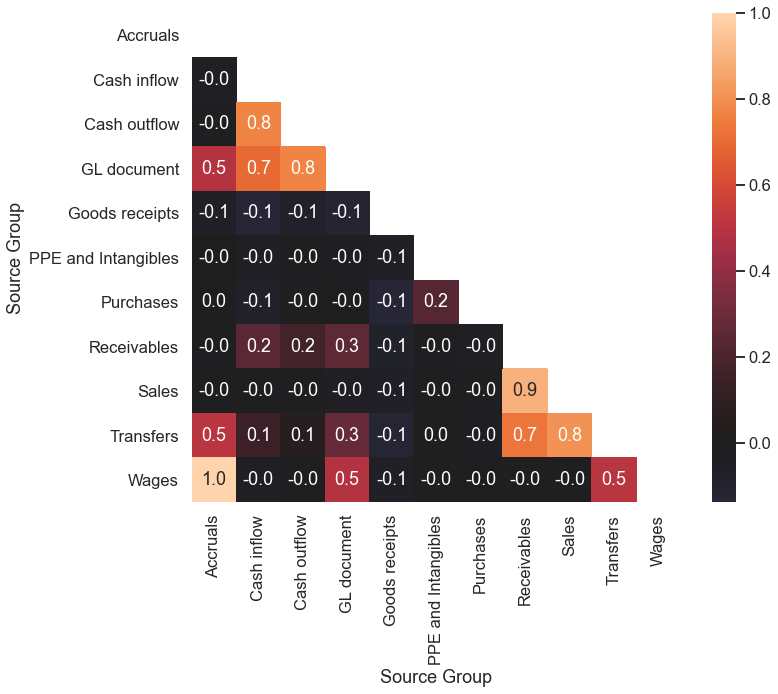

In [9]:
fig, ax = plt.subplots(figsize=(11,9))
fig = sns.heatmap(data=test_corr, mask=mask, annot=True, vmax=1, center=0, square=True, fmt=".1f")
fig = fig.get_figure()